##**IMPORT LIBRARIES**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt

**LOADING & SPILTING DATA**

In [ ]:
batch_size= 32
img_height=224
img_width=224
epochs= 10

In [ ]:
data_dir="/content/drive/MyDrive/boat_data"
train_dir="/content/drive/MyDrive/boat_data/train"
test_dir="/content/drive/MyDrive/boat_data/test"

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3898 files belonging to 23 classes.
Using 3119 files for training.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3898 files belonging to 23 classes.
Using 779 files for validation.


**USING PRE-TRAINED MODEL**

In [ ]:
from tensorflow.keras import layers,models
from tensorflow.keras.applications import MobileNetV2

In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = True


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(23, activation='softmax')

])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

history= model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    )

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 762s 7s/step - accuracy: 0.7268 - loss: 1.0443 - val_accuracy: 0.5340 - val_loss: 6.3591
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 631s 6s/step - accuracy: 0.8854 - loss: 0.3864 - val_accuracy: 0.2798 - val_loss: 17.4697
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 628s 6s/step - accuracy: 0.9194 - loss: 0.2809 - val_accuracy: 0.6008 - val_loss: 4.7126
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 603s 6s/step - accuracy: 0.9390 - loss: 0.2172 - val_accuracy: 0.0924 - val_loss: 24.4277
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 636s 6s/step - accuracy: 0.9570 - loss: 0.1740 - val_accuracy: 0.5045 - val_loss: 4.9318
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 620s 6s/step - accuracy: 0.9500 - loss: 0.1719 - val_accuracy: 0.3761 - val_loss: 20.4175
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 631s 6s/step - accuracy: 0.9598 - loss: 0.1367 - val_accuracy: 0.3517 - val_loss: 20.5183
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 616s 6s/step - accuracy: 0.9499 - loss: 0.1661 - val_accuracy: 0.2426

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │        29,463 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,346,375 (8.95 MB)

 Trainable params: 29,463 (115.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 58,928 (230.19 KB)

Training Insights
- Training Accuracy steadily improved from ~72% to ~96%, which is a strong sign the model is learning well.
- Validation accuracy jumps around (53%, 27%, 60%, 9%, etc.) , which means the model is not generalizing well.
- Validation loss is very high (up to 46) ,hich means the model is making big mistakes on unseen data.

**ADJUSTED MODEL TRAINING**

In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5), #Added droupout to reduce overfitting and for better generalization
    layers.Dense(23, activation='softmax')

])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
# Add early stopping to prevent over-training
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history= model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    )

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2935 - loss: 2.6348 - val_accuracy: 0.5237 - val_loss: 1.6390
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.5095 - loss: 1.6649 - val_accuracy: 0.5469 - val_loss: 1.4695
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5493 - loss: 1.4820 - val_accuracy: 0.5944 - val_loss: 1.3816
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5786 - loss: 1.3386 - val_accuracy: 0.6457 - val_loss: 1.3027
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.6165 - loss: 1.2478 - val_accuracy: 0.5700 - val_loss: 1.2940
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.6131 - loss: 1.2236 - val_accuracy: 0.6367 - val_loss: 1.2491
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6405 - loss: 1.1405 - val_accuracy: 0.6187 - val_loss: 1.2228
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.6527 - loss: 1.0714 - val_accuracy: 0.6585 - v

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │        29,463 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,346,375 (8.95 MB)

 Trainable params: 29,463 (115.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 58,928 (230.19 KB)

**TRAINING INSIGHTS FOR THE ADJUSTED MODEL**
- The model learnt steadily and generalized well.

- The dropout and early stopping strategies were also helpful.

**PREPROCESSING FOR PREDICTION**

In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

img_path="/content/drive/MyDrive/boat_data/test.jpg"
def preprocess_image(img_path, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array


In [ ]:
predictions = model.predict(img_array)
predicted_classes = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


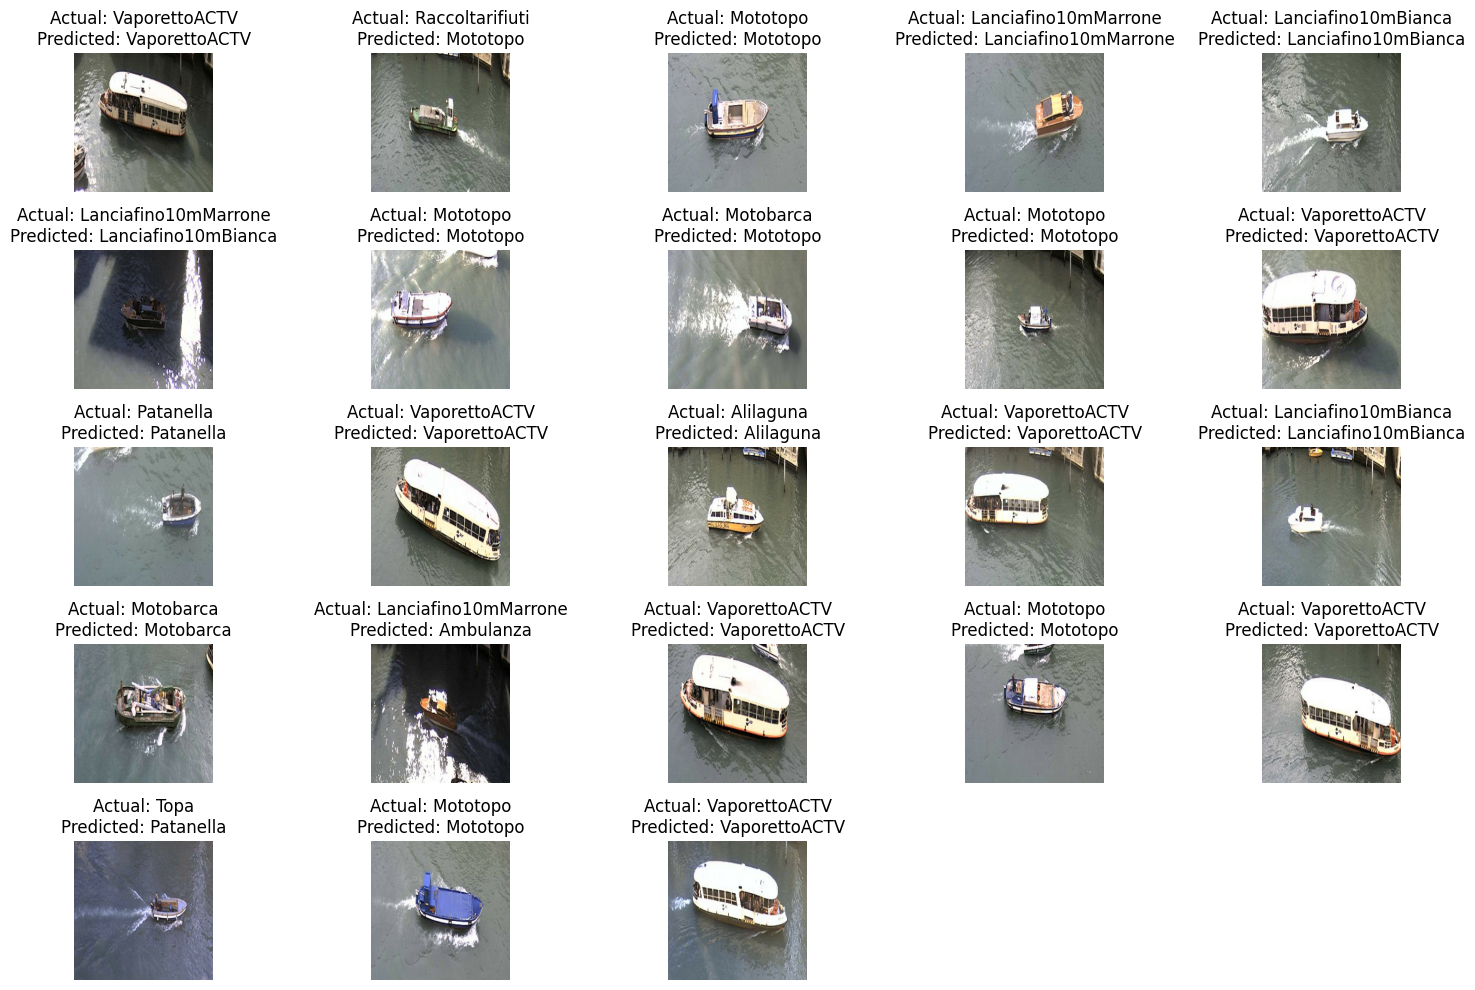

In [ ]:
# Make predictions on sample images
plt.figure(figsize=(15, 10))
for images, labels in val_ds.take(1):
    for i in range(23):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Get prediction
        predictions = model.predict(tf.expand_dims(images[i], axis=0))
        predicted_class = class_names[np.argmax(predictions[0])]
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        plt.axis("off")

plt.tight_layout()
plt.show()

**EVALUATION METRICS**

In [ ]:
# Evaluate model performance
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6471 - loss: 1.1822
Test Accuracy: 66.11%
Test Loss: 1.1302
